# DAT210x - Programming with Python for DS

## Module4- Lab1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [3]:
reduce_factor = 100

Load up the scanned armadillo:

In [4]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [9]:
armadillo.tail(10)

,x,y,z
1720,24.893152,14.381167,23.366495
1721,6.882793,2.376356,4.927309
1722,6.882793,-35.141109,10.501949
1723,16.745611,7.181034,87.360153
1724,6.882793,-18.494360,25.939396
1725,24.893152,-17.021006,35.373402
1726,6.849707,34.196575,45.665031
1727,34.834377,-2.252964,43.520943
1728,4.457411,-47.241844,-48.912315
1729,-29.477325,52.658680,85.095596


In [39]:
def do_PCA(armadillo, svd_solver):
    from sklearn.decomposition import PCA

    svd_solver = svd_solver

    pca = PCA(n_components=2, svd_solver=svd_solver)
    pca.fit(armadillo)

    t = pca.transform(armadillo)
    
    return t

### Preview the Data

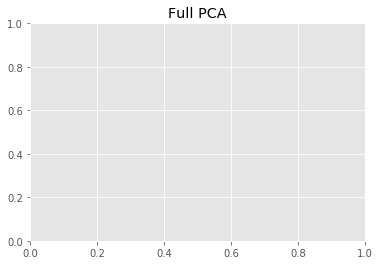

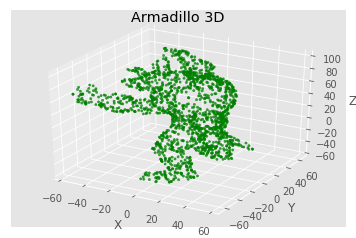

In [40]:
# Render the Original Armadillo

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

plt.show()

### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [47]:
%timeit transform = do_PCA(armadillo, 'full')

424 µs ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
transform = do_PCA(armadillo, 'full')

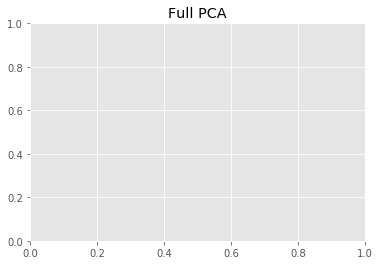

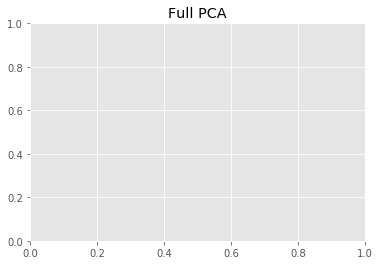

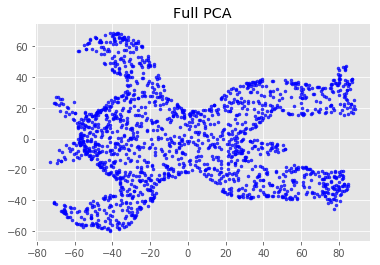

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(transform[:,0], transform[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [51]:
%timeit rpca = do_PCA(armadillo, 'randomized')

424 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
trpca = do_PCA(armadillo, 'randomized')

Let's see what the results look like:

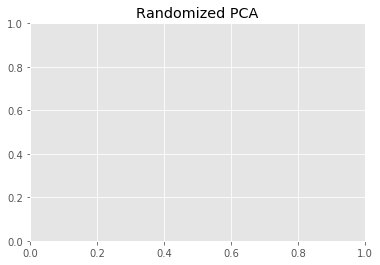

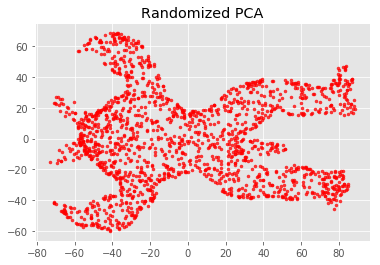

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(trpca[:,0], trpca[:,1], c='red', marker='.', alpha=0.75)
plt.show()